The video game industry is masssive, seeing billions of dollars worth of sales every year. What can analyzing some data collected on the gaming industry tell us about some of the trends in the industry? Is it also possible that we could predict some sales figures based on analyzing trends in the data?

As you might expect, we'll start off by importing all the libraries we will need.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

Let's start off by loading the data and checking the number of occurences for features we might be intereseted in.

In [2]:
df = pd.read_csv("vgsales.csv")

# get an idea of the total number of occurences for important features

publishers = df['Publisher'].unique()
platforms = df['Platform'].unique()
genres = df['Genre'].unique()

print("Number of games: ", len(df))
print("Number of publishers: ", len(publishers))
print("Number of platforms: ", len(platforms))
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


We need to be sure that our data is free of any null values, so we'll check for them and drop them if there are any.

In [3]:
# check to see if there are any null values
print(df.isnull().sum())

# drop them if there are any
df = df.dropna()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


One of the first things we may try doing is checking to see how many global game sales there are a year. We can count how many years there are in the database, then we can plot the years against the global sales.

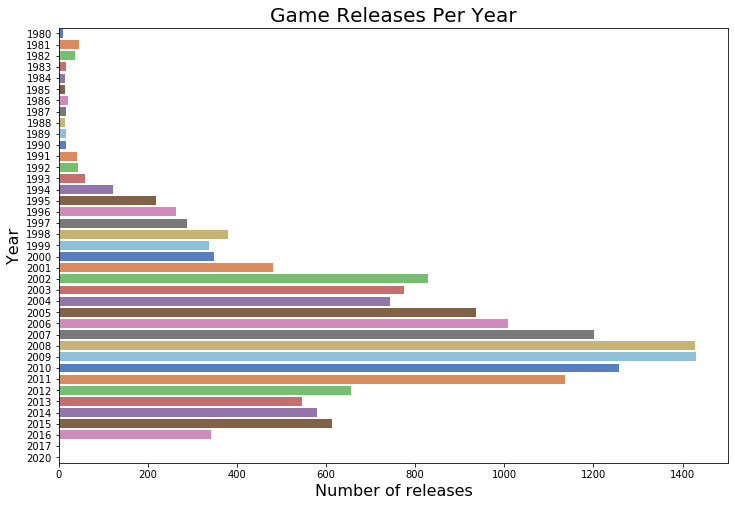

In [4]:
# if we wanted the counts instead, we could just use Count. Count returns the number of instances,
# not the sums of the values like above
x = df.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)

plt.show()

Let's get an idea of how many games are published by specific publishers. There's a lot of publishers in this list, so we want to drop any publishers that have published fewer than a chosen number of games. Let's set 75 as a threshhold. We'll also apply this same method to the platforms the games are published on.

After dropping much of the data, we can try plotting the remaining data that we've put into a new dataframe. We'll plot the number of games plublished by both the most prolific publishers and the number published on different consoles.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%   

c:\users\daniel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\daniel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


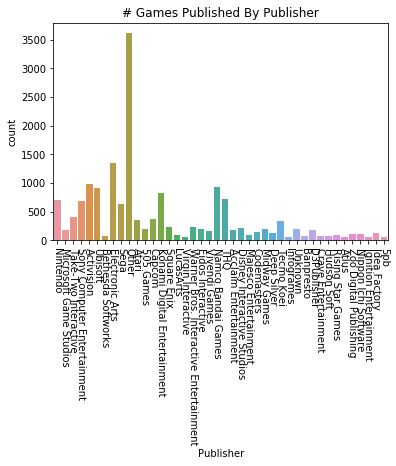

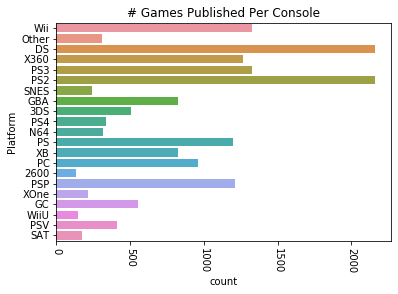

In [5]:
vg_data = pd.read_csv('vgsales.csv')

print(vg_data.info())
print(vg_data.describe())

# let's choose a cutoff and drop any publishers that have published less than X games

for i in vg_data['Publisher'].unique():
    if vg_data['Publisher'][vg_data['Publisher'] == i].count() < 60:
        vg_data['Publisher'][vg_data['Publisher'] == i] = 'Other'

for i in vg_data['Platform'].unique():
    if vg_data['Platform'][vg_data['Platform'] == i].count() < 100:
        vg_data['Platform'][vg_data['Platform'] == i] = 'Other'

#try plotting the new publisher and platform data
sns.countplot(x='Publisher', data=vg_data)
plt.title("# Games Published By Publisher")
plt.xticks(rotation=-90)
plt.show()

plat_data = vg_data['Platform'].value_counts(sort=False)
sns.countplot(y='Platform', data=vg_data)
plt.title("# Games Published Per Console")
plt.xticks(rotation=-90)
plt.show()

We can also try plotting variables against each other, like getting the global sales of games by their genre.

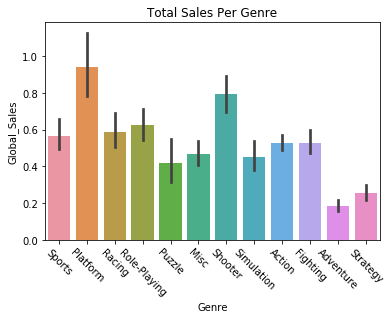

In [6]:
sns.barplot(x='Genre', y='Global_Sales', data=vg_data)
plt.title("Total Sales Per Genre")
plt.xticks(rotation=-45)
plt.show()

We can filter and plot by multiple criteria.
If we wanted to check and see how many games are published in a given genre AND filter by platform we can do that.
We just need to get the individual platforms, which we can do by filtering the "platform" feature with a "unique" function. Then we just have to plot the platform and genre data for each of those platforms.

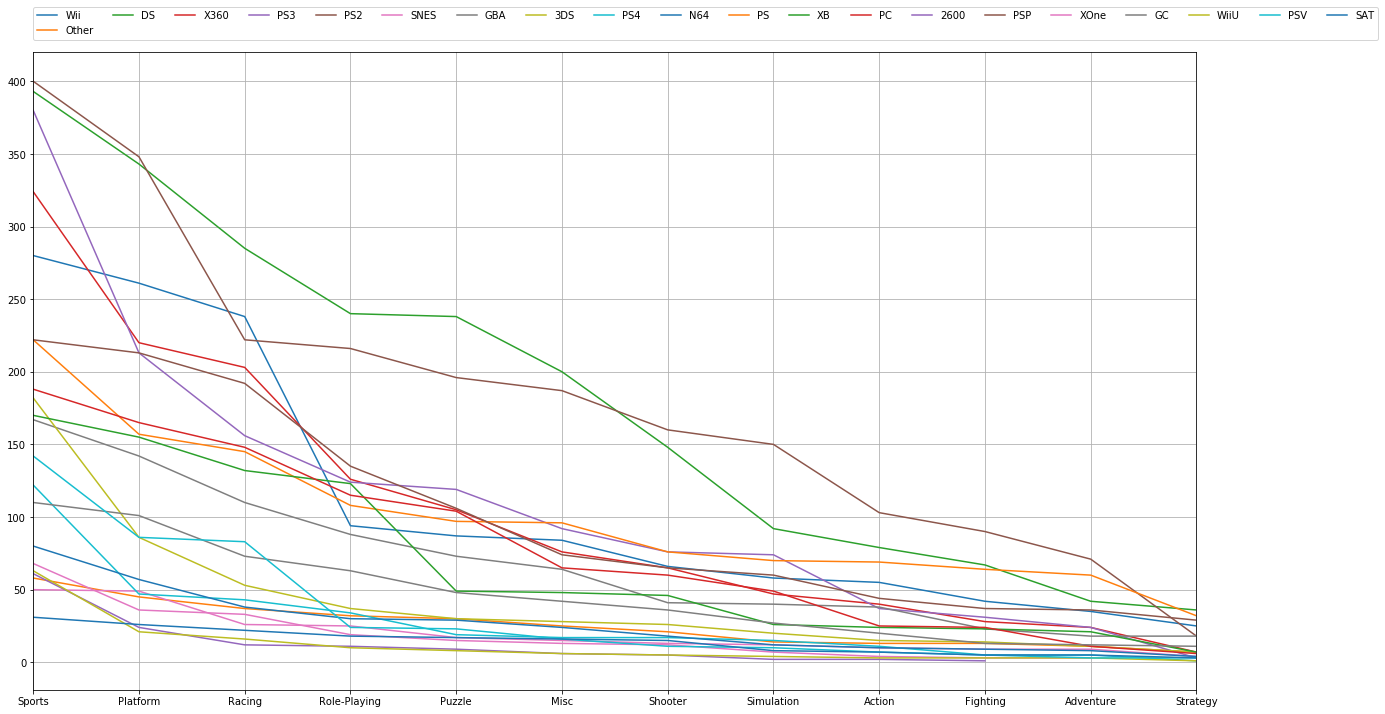

In [7]:
# try visualizing the number of games in a specific genre
for i in vg_data['Platform'].unique():
    vg_data['Genre'][vg_data['Platform'] == i].value_counts().plot(kind='line', label=i, figsize=(20, 10), grid=True)

# set the legend and ticks

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=20, borderaxespad=0.)
plt.xticks(np.arange(12), tuple(vg_data['Genre'].unique()))
plt.tight_layout()
plt.show()

Now that we've plotted some of the data, let's try predicting some trends based off of the data. We can carry out linear regression to get an idea of how global sales figures could end up based on North American sales figures. First we need to separate our data into train and test sets. We'll start by setting North American sales as our X variable and global sales as our Y variable, and then do train/test split.

In [8]:
# going to attempt to carry out linear regression and predict the global sales of games
# based off of the sales in North America

X = vg_data.iloc[:, 6].values
y = vg_data.iloc[:, 10].values

# train test split and split the dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

The data needs to be reshaped in order to be compatible with Linear Regression, so we'll do that with the following commands. We're reshaping them into two long 2D arrays that have as many rows as necessary and a single column. After that we can fit the data in the Linear Regression function.

In [9]:
# reshape the data into long 2D arrays with 1 column and as many rows as necessary
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's check to see how our regression algorithm performed. We should plot the correlation between the variable's training data, and plot the line of best fit from our regressor. We'll then do the same thing for our testing data. Essentially we're looking to see how the regression line fits both the training and testing data. 

The regression lines should look approximately the same, and indeed they look fairly similar. The training set regression shows approximately 70 million sales for 40 million North American sales, while the test set regression may be just a little higher. We'll also print the scores on the training and test sets, and see that our Linear Regression implementation had similar, though slightly worse accuracy on the testing set.

Let's make a function to handle the plotting.

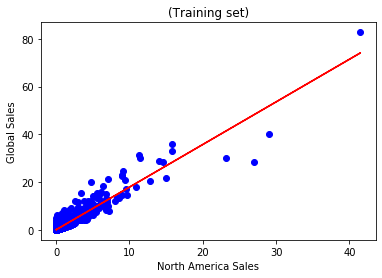

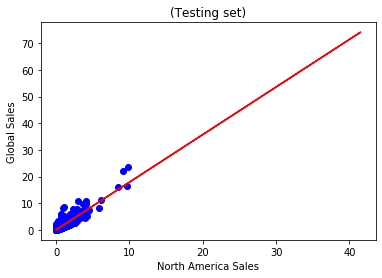

Training set score: 0.89
Test set score: 0.87


In [10]:
def plot_regression(classifier):

    plt.scatter(X_train, y_train,color='blue')
    plt.plot(X_train, classifier.predict(X_train), color='red')
    plt.title('(Training set)')
    plt.xlabel('North America Sales')
    plt.ylabel('Global Sales')
    plt.show()

    plt.scatter(X_test, y_test,color='blue')
    plt.plot(X_train, classifier.predict(X_train), color='red')
    plt.title('(Testing set)')
    plt.xlabel('North America Sales')
    plt.ylabel('Global Sales')
    plt.show()
    
plot_regression(lin_reg)
print("Training set score: {:.2f}".format(lin_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lin_reg.score(X_test, y_test)))

We can now implement some other regression algorithms and see how they perform. Let's try using a Decision Tree regressor.

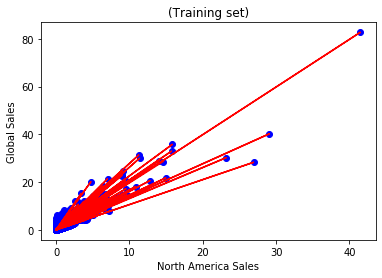

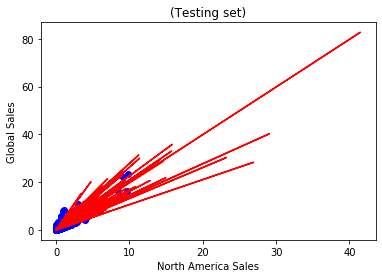

Training set score: 0.96
Test set score: 0.81


In [11]:
DTree_regressor = DecisionTreeRegressor(random_state=5)
DTree_regressor.fit(X_train, y_train)
plot_regression(DTree_regressor)

print("Training set score: {:.2f}".format(DTree_regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(DTree_regressor.score(X_test, y_test)))

Now let's try a Random Forest regressor algorithm.

c:\users\daniel\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


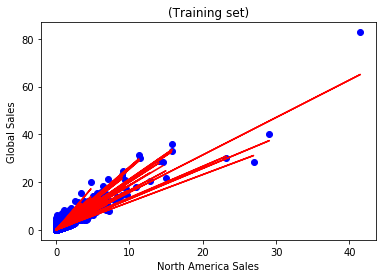

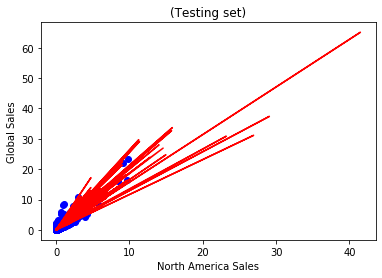

Training set score: 0.94
Test set score: 0.84


In [12]:
RF_regressor = RandomForestRegressor(n_estimators=300, random_state=5)
RF_regressor.fit(X_train, y_train)
plot_regression(RF_regressor)

print("Training set score: {:.2f}".format(RF_regressor.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RF_regressor.score(X_test, y_test)))

It looks like Random Forest and plain Linear Regression have comparable performance. However, we might be able to find a regression algorithm that performs better than these two. We'll use a type of dimensionality reduction called Principal Component Analysis, which tries to distill the important features of a training set down to just the features that have the most influence on the labels/outcome. By reducing the dimensionality/complexity of a featureset, a representation that contains the features with the most predictive power is created. This can improve the predictive power of a regressor.

We'll create a Scikit-learn Pipeline, which allows us to specify what kind of regression algorithm we want to use (Linear Regression) and how we want to set up the features for it (use the Standard Scaler and PCA). 

Note that there's only one feature we're predicting off of here, North American sales, so PCA can't simplify the representation anymore. But if we had more features we were doing regression on PCA could be useful.

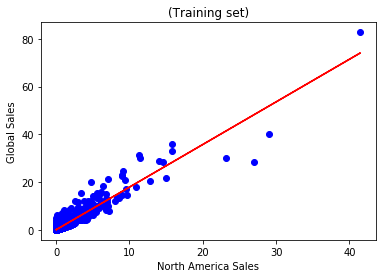

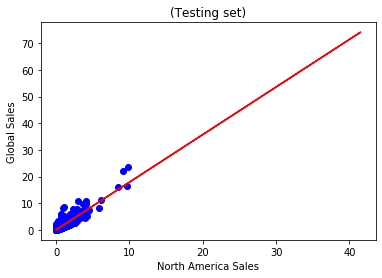

Training set score: 0.89
Test set score: 0.87


In [13]:
components = [
    ('scaling', StandardScaler()),
    ('PCA', PCA()),
    ('regression', LinearRegression())
]

pca = Pipeline(components)
pca.fit(X_train, y_train)
plot_regression(pca)
print("Training set score: {:.2f}".format(pca.score(X_train, y_train)))
print("Test set score: {:.2f}".format(pca.score(X_test, y_test)))

We're now going to try using different regression algorithms to see what kinds of results we get.

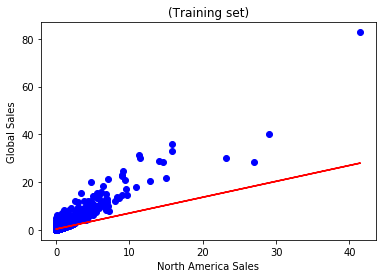

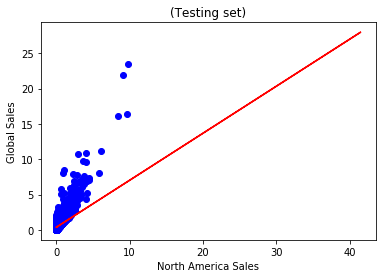

Training set score: 0.54
Test set score: 0.51


In [14]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)
plot_regression(elastic)
print("Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))

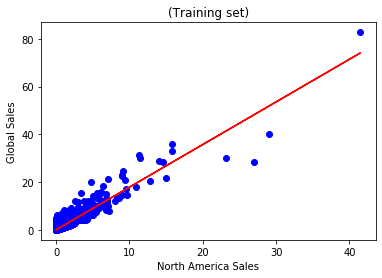

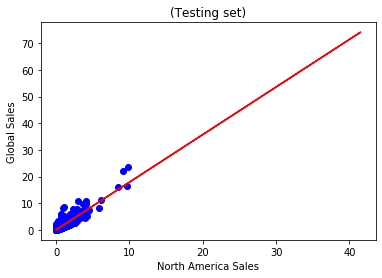

Training set score: 0.89
Test set score: 0.87


In [15]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
plot_regression(ridge_reg)
print("Training set score: {:.2f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge_reg.score(X_test, y_test)))

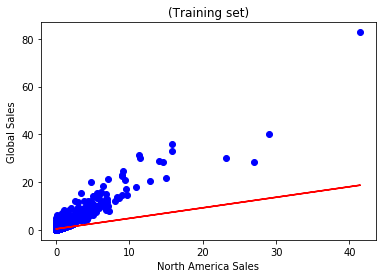

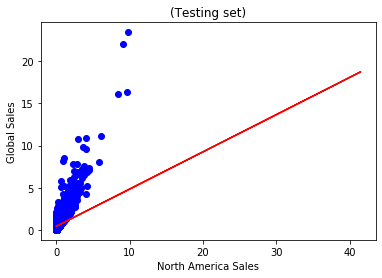

Training set score: 0.38
Test set score: 0.36


In [16]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
plot_regression(lasso_reg)
print("Training set score: {:.2f}".format(lasso_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_reg.score(X_test, y_test)))

c:\users\daniel\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


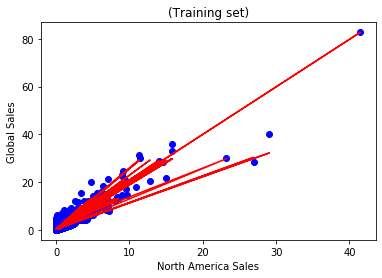

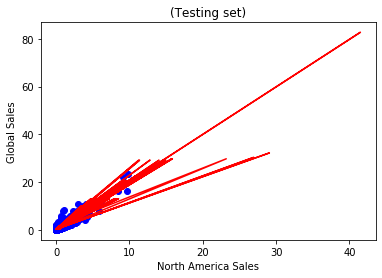

Training set score: 0.89
Test set score: 0.81


In [17]:
# ADA Boost regressor
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train, y_train)
plot_regression(ada_reg)

print("Training set score: {:.2f}".format(ada_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ada_reg.score(X_test, y_test)))

It looks like Ridge Regression and AdaBoost did the best at predicting the trend.